- Load the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(
    r"C:\Users\bezis\Downloads\ethiopia-fi-forecast\data\raw\ethiopia_fi_unified_data.xlsx",
    sheet_name="ethiopia_fi_unified_data"
)

impact_links = pd.read_excel(
     r"C:\Users\bezis\Downloads\ethiopia-fi-forecast\data\raw\ethiopia_fi_unified_data.xlsx",
    sheet_name="Impact_sheet"
)


In [ ]:
Record by record_type
data['record_type'].value_counts()


record_type
observation    30
event          10
target          3
Name: count, dtype: int64

In [ ]:
# Record bt pillar
data['pillar'].value_counts()


pillar
ACCESS           16
USAGE            11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

In [ ]:
# Records by source
data['source_type'].value_counts()


source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64

Overall, the dataset is strongest in Access and Usage observations derived mainly from operators and surveys. Event records provide useful contextual explanations for trend changes, but limited affordability and target data constrain deeper policy evaluation.

- Temporal coverage

In [8]:
data['year'] = pd.to_datetime(data['observation_date']).dt.year

data.groupby('indicator_code')['year'].nunique().sort_values()


indicator_code
ACC_MOBILE_PEN        1
EVT_ETHIOPAY          1
EVT_CROSSOVER         1
AFF_DATA_INCOME       1
EVT_MPESA_INTEROP     1
EVT_MPESA             1
EVT_FX_REFORM         1
EVT_FAYDA             1
EVT_NFIS2             1
EVT_SAFARICOM         1
EVT_SAFCOM_PRICE      1
EVT_TELEBIRR          1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_ACTIVE_RATE       1
GEN_GAP_MOBILE        1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
USG_P2P_VALUE         1
USG_MPESA_USERS       1
USG_CROSSOVER         1
USG_MPESA_ACTIVE      1
ACC_4G_COV            2
ACC_MM_ACCOUNT        2
USG_P2P_COUNT         2
GEN_MM_SHARE          2
GEN_GAP_ACC           2
ACC_FAYDA             3
ACC_OWNERSHIP         5
Name: year, dtype: int64

Indicator coverage is highly uneven. While account ownership is tracked across five survey years, most access, usage, and gender indicators appear only once. This severely limits longitudinal analysis and suggests that Ethiopia’s financial inclusion measurement remains event-driven rather than continuously monitored.

- Account ownership trend (2011–2024)

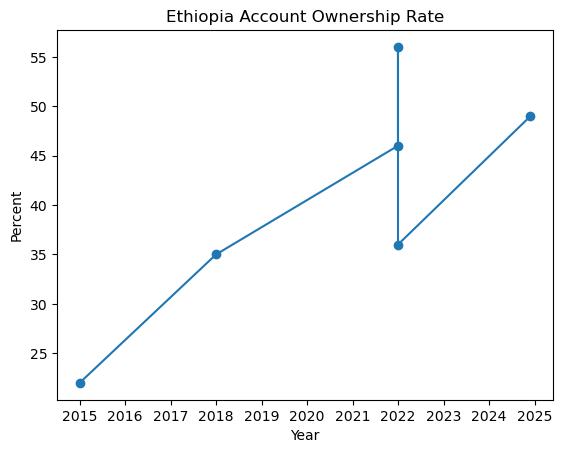

In [9]:
acc = data[
    (data['indicator_code'] == 'ACC_OWNERSHIP') &
    (data['record_type'] == 'observation')
].sort_values('observation_date')

plt.plot(acc['observation_date'], acc['value_numeric'], marker='o')
plt.title("Ethiopia Account Ownership Rate")
plt.ylabel("Percent")
plt.xlabel("Year")
plt.show()


In [10]:
acc['growth_pp'] = acc['value_numeric'].diff()
acc[['observation_date', 'value_numeric', 'growth_pp']]


,observation_date,value_numeric,growth_pp
0,2014-12-31,22.0,NaN
1,2017-12-31,35.0,13.0
2,2021-12-31,46.0,11.0
3,2021-12-31,56.0,10.0
4,2021-12-31,36.0,-20.0
5,2024-11-29,49.0,13.0


- USAGE analysis (mobile money)

In [11]:
usage = data[
    data['indicator_code'].str.contains('USG', na=False)
]

usage.groupby('indicator_code')['value_numeric'].mean()


indicator_code
USG_ACTIVE_RATE       6.600000e+01
USG_ATM_COUNT         1.193000e+08
USG_ATM_VALUE         1.561000e+11
USG_CROSSOVER         1.080000e+00
USG_MPESA_ACTIVE      7.100000e+06
USG_MPESA_USERS       1.080000e+07
USG_P2P_COUNT         8.900000e+07
USG_P2P_VALUE         5.777000e+11
USG_TELEBIRR_USERS    5.484000e+07
USG_TELEBIRR_VALUE    2.380000e+12
Name: value_numeric, dtype: float64

In [12]:
pivot = data.pivot_table(
    index='year',
    columns='indicator_code',
    values='value_numeric'
)

pivot.corr()


indicator_code,ACC_4G_COV,ACC_FAYDA,ACC_MM_ACCOUNT,ACC_MOBILE_PEN,ACC_OWNERSHIP,AFF_DATA_INCOME,GEN_GAP_ACC,GEN_GAP_MOBILE,GEN_MM_SHARE,USG_ACTIVE_RATE,USG_ATM_COUNT,USG_ATM_VALUE,USG_CROSSOVER,USG_MPESA_ACTIVE,USG_MPESA_USERS,USG_P2P_COUNT,USG_P2P_VALUE,USG_TELEBIRR_USERS,USG_TELEBIRR_VALUE
indicator_code,,,,,,,,,,,,,,,,,,,
ACC_4G_COV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_FAYDA,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ACC_MM_ACCOUNT,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MOBILE_PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_OWNERSHIP,NaN,1.0,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AFF_DATA_INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_ACC,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_MM_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
